# Pandas Jupyter: Twitter Analysis Workflow

This example uses our Pandas - Jupyter exercise to set up a Twitter workflow. The workflow modeled assumes that you have exported data first as a CSV after collecting it using TAGS, which is an excellent choice for rapid "in the moment" scraping. This demo will use these methods to visualize and analyze the #ReleaseTheSnyderCut hashtag, but it can be converted to any other Twitter collection using the same methods as indicated throughout.

## Stage One: Import Libraries  / Data

First, we import all necessary libraries. To adjust this workflow, change the contents of the variable file_name below to the name of your CSV file. Make sure the file is co-located (stored in the same folder) with your notebook to use the formatting as written.

In [28]:
file_name = 'snyder_cut.csv'
import pandas as pd

df = pd.read_csv(file_name, delimiter=",")

C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Stage Two: Display a Summary and Sub-sections of the Data

Note that your dataset may have errors on importing depending on contents / scale.

This stage displays some summary information, a random sample, and the ten most common usernames in the dataset so we can get a sense of the contents.

In [29]:
print(df.describe(include='all'))

print(df.sample(10))

print(df['from_user'].value_counts()[:10])

              id_str  from_user  \
count   1.333640e+05     133364   
unique           NaN      62302   
top              NaN  Josh62488   
freq             NaN        819   
mean    1.263391e+18        NaN   
std     1.756599e+14        NaN   
min     1.263200e+18        NaN   
25%     1.263238e+18        NaN   
50%     1.263324e+18        NaN   
75%     1.263516e+18        NaN   
max     1.263900e+18        NaN   

                                                     text  \
count                                              133364   
unique                                              19162   
top     RT @ZackSnyder: This is real. #releasethesnyde...   
freq                                                22644   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                           

## Stage Three: Clean Your Data

Cleaning Twitter data is dependent upon your goals: for this example, we first remove all duplicates by text (to avoid the excessive retweets). We then delete several columns that aren't useful for our analysis - this might vary by project, so to edit this, comment out any deletions below that don't apply. 

In [30]:
# The first section deletes the unwanted columns
del df['geo_coordinates']
del df['user_lang']
del df['in_reply_to_screen_name']
del df['in_reply_to_status_id_str']
del df['in_reply_to_user_id_str']
del df['from_user_id_str']
del df['source']
del df['profile_image_url']
del df['status_url']
del df['entities_str']
del df['id_str']

In [31]:
# The second section drops duplicates and replaces empty text

df = df.drop_duplicates('text')
df.fillna('Not available')

,from_user,text,created_at,time,user_followers_count,user_friends_count,user_location
0,jOsUeNaTa,RT @justiceleaguewb: The Snyder Cut is coming ...,Fri May 22 18:30:39 +0000 2020,22/05/2020 19:30:39,267,844,Guatemala
1,RetweetDc,"RT @MnMJax98: #ReleaseTheSnyderCut fam, I have...",Fri May 22 18:30:19 +0000 2020,22/05/2020 19:30:19,1527,39,Gotham City
2,MnMJax98,"#ReleaseTheSnyderCut fam, I have an idea and i...",Fri May 22 18:30:15 +0000 2020,22/05/2020 19:30:15,397,811,"British Columbia, Canada"
3,Turykun,RT @ZackSnyder: This is real. #releasethesnyde...,Fri May 22 18:30:04 +0000 2020,22/05/2020 19:30:04,142,227,Not available
4,Andi_H3ld,RT @87anoopmenon: For all to know how the #Rel...,Fri May 22 18:30:00 +0000 2020,22/05/2020 19:30:00,478,1276,"Frankfurt am Main, Deutschland"
...,...,...,...,...,...,...,...
133309,deadite101,RT @GeoffSheeran: @ZackSnyder @hbomax I’m read...,Wed May 20 20:08:14 +0000 2020,20/05/2020 21:08:14,384,442,"ÜT: 36.75323,-108.21687"
133339,CK61938,I went and made a video:\n\nhttps://t.co/FsRRV...,Wed May 20 20:08:08 +0000 2020,20/05/2020 21:08:08,1034,280,"Newcastle Upon Tyne, England"
133340,gameinfinite10,*breaking* The Snyder Cut is HAPPENING! It is ...,Wed May 20 20:08:08 +0000 2020,20/05/2020 21:08:08,841,2978,"Milwaukee, WI"
133343,affleck_bruce,Can't believe I'm gonna see this badass Batman...,Wed May 20 20:08:06 +0000 2020,20/05/2020 21:08:06,156,234,"Karachi, Pakistan"


## Stage Four: Plot Your Data

This notebook includes three visualizations that should work with any dataset.

To handle larger datasets with multiple days of date, the first example plots over time, but first truncates each timestamp to remove minutes and seconds. 

The second example uses extraction to draw any element with the structure "#text" out of our text. We can then plot the values of common hashtags: excluding the hashtag at 0 is an easy way to remove the original search query.

The final example uses a pie chart (which is rarely as useful) to demonstrate relative activity of users. This is a good quick way to see how much a particular conversation relies upon a few participants or amplifiers.

0    22/05/2020 19
1    22/05/2020 19
2    22/05/2020 19
3    22/05/2020 19
4    22/05/2020 19
Name: tweet_hour, dtype: object


<AxesSubplot:title={'center':'Tweet Volume by Hour'}>

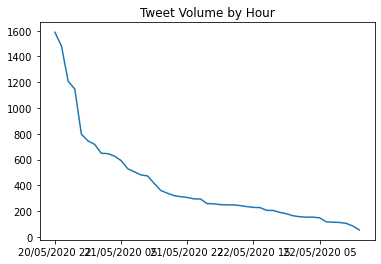

In [42]:
# First Visualization: Data Over Time (Simplified to Hour)
 
df['tweet_hour'] = df['time']
df['tweet_hour'] = df['tweet_hour'].str.slice(0, 13)

print(df['tweet_hour'][:5])

df['tweet_hour'].value_counts().plot(kind='line', title = 'Tweet Volume by Hour')

<AxesSubplot:title={'center':'Top Hashtags'}>

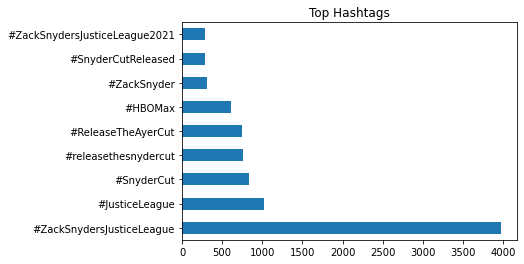

In [45]:
# Second Visualization : Hashtags in the Data

hashtags = df['text'].str.extractall(r'(\#\w+)')[0].value_counts()

hashtags[1:10].plot(kind='barh', title='Top Hashtags')


<AxesSubplot:title={'center':'Top Users'}, ylabel='from_user'>

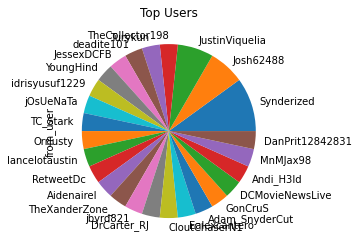

In [46]:
# Third Visualization: Users

df['from_user'][0:30].value_counts().plot(kind='pie', title='Top Users')

## Stage Five: Draw Comparisons and Make Claims

While I won't analyze this dataset here, try borrowing these methods and playing with the parameters to see what you can find!

# Bonus: Export a Meaningful Visualization

This requires two tools: first, we have to grab the figure itself using get_figure from whichever visualization has been most successful.

Next, we can use savefig for a range of filetypes: note that long text will get cut off without using the parameters below.

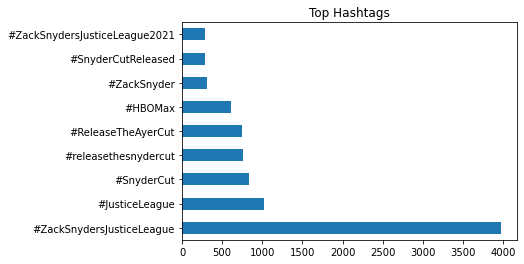

In [49]:
fig = hashtags[1:10].plot(kind='barh', title='Top Hashtags').get_figure()
fig.savefig('hashtags.png', dpi=300, bbox_inches='tight')